In [1]:
import numpy as np
import pandas as pd
import sys
import os
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
file_folder = os.getcwd()
print(file_folder)
train_data_path = file_folder +'\\data\\train.csv'
test_data_path = file_folder + '\\data\\test.csv'
store_data_path = file_folder +'\\data\\store.csv'
print(train_data_path)

C:\Users\XuanYang\Documents\GitHub\Rossmann-Store-Sales
C:\Users\XuanYang\Documents\GitHub\Rossmann-Store-Sales\data\train.csv


# Data Field

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store 商店ID
- Sales - the turnover for any given day (this is what you are predicting) 所给日期的该商店的营销额
- Customers - the number of customers on a given day 当天到店消费者
- Open - an indicator for whether the store was open: 0 = closed, 1 = open 商店是否开张
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None 国家节日（a-公共假期，b-复活节，c-圣诞节，0 - 无）
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools 表示是否收公共学校关闭的影响
- StoreType - differentiates between 4 different store models: a, b, c, d 商店类型
- Assortment - describes an assortment level: a = basic, b = extra, c = extended 产品组合分类
- CompetitionDistance - distance in meters to the nearest competitor store 竞争商店距离（米）
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened 最近的竞争商店开张的时间（月/年）
- Promo - indicates whether a store is running a promo on that day 是否商店当天有优惠
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating 是否参加连续优惠
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2 商店参加连续优惠的时间（年/日历周）
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g.  "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store 连续优惠的间隔


In [4]:
data  = pd.read_csv(train_data_path,na_values = np.nan,low_memory=False)

In [5]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [7]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
data.groupby('StateHoliday').Store.count()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: Store, dtype: int64

In [9]:
data.shape

(1017209, 9)

In [10]:
def ShowSales(storeID = 1, data_range_min = 0, data_range_max = 50):
    
    sale_date = data[data.Store == storeID].Date[data_range_min:data_range_max]
    store_sales = data[data.Store == storeID].Sales[data_range_min:data_range_max]
#     plt.figure(figsize = (100,30))
    plt.autoscale()
    plt.bar(sale_date,store_sales)
    plt.xticks(rotation = 90)
    plt.show()
    return

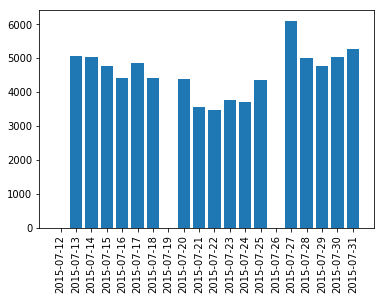

In [11]:
ShowSales(data_range_max = 20)

In [12]:
sale_date = data[data.Store == 1].Date[:20]
store_sales = data[data.Store == 1].Sales[:20]

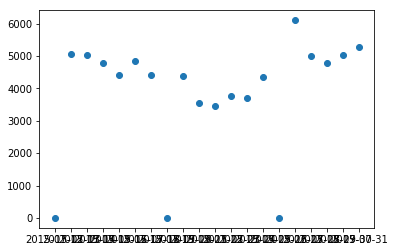

In [13]:
plt.scatter(sale_date.astype(str),store_sales)
plt.show()

In [14]:
store_gp = data.groupby('Store')
Group_store = store_gp
Group_store['Date'].unique()

Store
1       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
2       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
3       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
4       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
5       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
6       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
7       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
8       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
9       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
10      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
11      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
12      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
13      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
14      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
15      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
16      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
17      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
18      

In [119]:
records_counts = store_gp.Store.count()
records_counts.value_counts(normalize =False)

942    934
758    180
941      1
Name: Store, dtype: int64

In [129]:
a_filter = records_counts == 942
b_filter = records_counts == 758
rec_num = a_filter.value_counts().iloc[0]
med_pos = int((rec_num+1)/2)

In [130]:
a = a_filter.value_counts()
type(a)
a.iloc[0]

934

In [131]:
sales_summary = store_gp.Sales.agg(['sum','mean','std'])
sales_summary_sum = sales_summary[a_filter]['sum']
sales_summary_sum_b = sales_summary[b_filter]['sum']
a_rec_num = len(sales_summary_sum)
med_pos = int((a_rec_num+1)/2)
print(a_rec_num)
print(med_pos)
asales_max =sales_summary_sum.max()
asales_min =sales_summary_sum.min()
asales_sum =sales_summary_sum.sum()
asales_mean =sales_summary_sum.mean()
asales_std =sales_summary_sum.std()
asales_median = sales_summary_sum.sort_values().iloc[med_pos]

934
467


In [132]:
print(sales_summary_sum.sort_values().quantile(0.5))
print(asales_max)
print(asales_min)
print(asales_sum)
print(asales_mean)
print(asales_std)
print(asales_median)

5228831.5
19516842
2114322
5127135508
5489438.445396146
1982197.101310591
5229014


In [133]:
asales_sum_Q1 = sales_summary_sum.sort_values().quantile(0.25)
asales_sum_Q2 = sales_summary_sum.sort_values().quantile(0.5)
asales_sum_Q3 = sales_summary_sum.sort_values().quantile(0.7)
IQR = asales_sum_Q3-asales_sum_Q1
print(asales_sum_Q1)
print(asales_sum_Q2)
print(asales_sum_Q3)
print(IQR)
asales_arr_sorted = sales_summary_sum.sort_values()
bsales_arr_sorted = sales_summary_sum_b.sort_values()
data_boxplt = [asales_arr_sorted,bsales_arr_sorted]

4164536.5
5228831.5
6008195.600000001
1843659.1000000006


{'boxes': [<matplotlib.lines.Line2D at 0x21ae87039b0>],
 'caps': [<matplotlib.lines.Line2D at 0x21ae8703ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ae85373c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21ae8537710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21ae8703588>,
  <matplotlib.lines.Line2D at 0x21ae8703cc0>]}

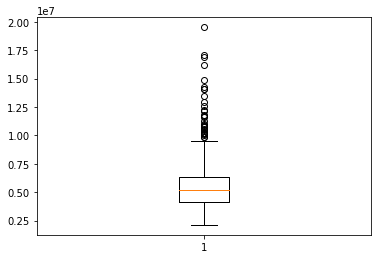

In [134]:
fig1,ax = plt.subplots()
ax.boxplot(asales_arr_sorted,whis = 1.5)

{'boxes': [<matplotlib.lines.Line2D at 0x21ae86eb080>],
 'caps': [<matplotlib.lines.Line2D at 0x21ae8708978>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ae8a15f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21ae8708550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21ae86ebba8>,
  <matplotlib.lines.Line2D at 0x21ae86ebc50>]}

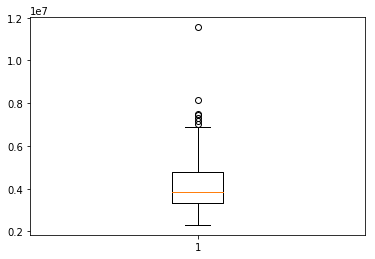

In [135]:
fig2,ax2 = plt.subplots()
ax2.boxplot(bsales_arr_sorted,whis =1.5)

C:\Users\XuanYang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x21ae8fc27b8>,
 'caps': [<matplotlib.lines.Line2D at 0x21ae8fcf240>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ae8fcfeb8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21ae8fcfa90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x21ae8fc2940>,
  <matplotlib.lines.Line2D at 0x21ae8fd6b70>]}

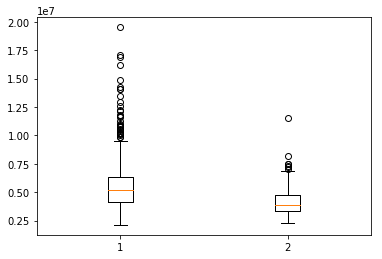

In [137]:
fig3,ax3 = plt.subplots()
ax3.boxplot(data_boxplt)

In [23]:
store_data = pd.read_csv(store_data_path,na_filter=np.nan,low_memory=False)

In [24]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
train_date = data['Date']
train_date.head

<bound method NDFrame.head of 0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
5          2015-07-31
6          2015-07-31
7          2015-07-31
8          2015-07-31
9          2015-07-31
10         2015-07-31
11         2015-07-31
12         2015-07-31
13         2015-07-31
14         2015-07-31
15         2015-07-31
16         2015-07-31
17         2015-07-31
18         2015-07-31
19         2015-07-31
20         2015-07-31
21         2015-07-31
22         2015-07-31
23         2015-07-31
24         2015-07-31
25         2015-07-31
26         2015-07-31
27         2015-07-31
28         2015-07-31
29         2015-07-31
              ...    
1017179    2013-01-01
1017180    2013-01-01
1017181    2013-01-01
1017182    2013-01-01
1017183    2013-01-01
1017184    2013-01-01
1017185    2013-01-01
1017186    2013-01-01
1017187    2013-01-01
1017188    2013-01-01
1017189    2013-01-01
1017190    2013-01-01
1017191    2013-01-01
10

In [26]:
from datetime import datetime

In [27]:
dt1 = datetime(2013,1,1)
dt2 = datetime(2015,7,31)
dt_delta = dt2-dt1
print(dt_delta)

941 days, 0:00:00


In [28]:
1017209/1115

912.295067264574

In [29]:
train_date = pd.to_datetime(train_date)
train_date.min

<bound method Series.min of 0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
5         2015-07-31
6         2015-07-31
7         2015-07-31
8         2015-07-31
9         2015-07-31
10        2015-07-31
11        2015-07-31
12        2015-07-31
13        2015-07-31
14        2015-07-31
15        2015-07-31
16        2015-07-31
17        2015-07-31
18        2015-07-31
19        2015-07-31
20        2015-07-31
21        2015-07-31
22        2015-07-31
23        2015-07-31
24        2015-07-31
25        2015-07-31
26        2015-07-31
27        2015-07-31
28        2015-07-31
29        2015-07-31
             ...    
1017179   2013-01-01
1017180   2013-01-01
1017181   2013-01-01
1017182   2013-01-01
1017183   2013-01-01
1017184   2013-01-01
1017185   2013-01-01
1017186   2013-01-01
1017187   2013-01-01
1017188   2013-01-01
1017189   2013-01-01
1017190   2013-01-01
1017191   2013-01-01
1017192   2013-01-01
1017193   2013-01-01
101719